<a href="https://colab.research.google.com/github/SaiKathika/Stock-Price-Prediction-using-ML-in-Python/blob/master/Linear_and_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install linear-regression
#!pip install DecisionTree
#!pip install matplotlib
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TCS.csv to TCS (1).csv


In [ ]:
df = pd.read_csv('TCS.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-29,2185.000000,2186.949951,2150.000000,2154.600098,2114.870850,2306761
1,2020-01-30,2160.000000,2165.000000,2125.000000,2137.850098,2098.429688,2098567
2,2020-01-31,2139.399902,2144.350098,2071.600098,2079.050049,2040.713623,3287223
3,2020-02-03,2152.000000,2194.699951,2093.199951,2102.500000,2063.731201,4728073
4,2020-02-04,2129.000000,2136.699951,2086.600098,2107.750000,2068.884521,3509339


In [ ]:
df.shape

(251, 7)

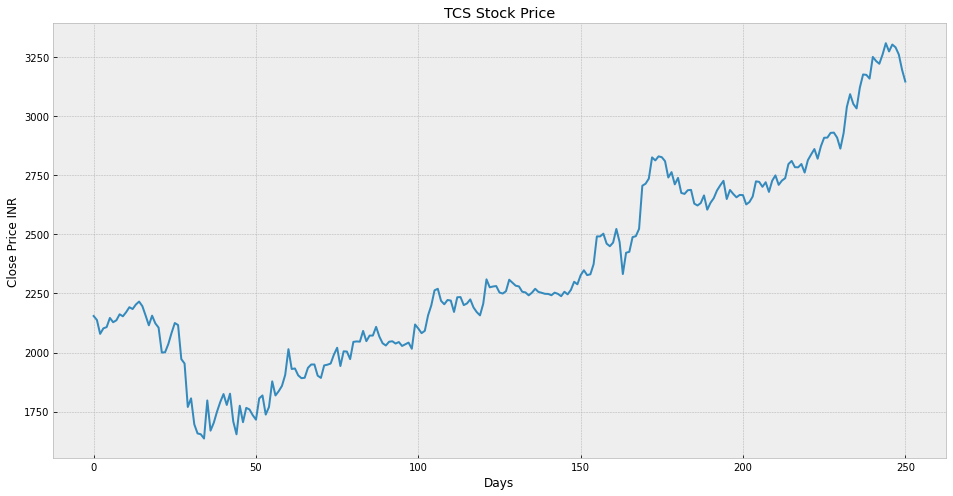

In [ ]:
plt.figure(figsize=(16,8))
plt.title('TCS Stock Price')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.show()

In [ ]:
df = df[['Close']]
df.head(5)

,Close
0,2154.600098
1,2137.850098
2,2079.050049
3,2102.500000
4,2107.750000


In [ ]:
#To predict 30 days in the future
predicted_days = 30

In [ ]:
df['Prediction'] = df[['Close']].shift(-predicted_days)
df.head(5)

,Close,Prediction
0,2154.600098,1806.300049
1,2137.850098,1696.400024
2,2079.050049,1658.000000
3,2102.500000,1654.400024
4,2107.750000,1636.349976


In [ ]:
#create a data set 'x' and remove the Predicted_days
x = np.array(df.drop(['Prediction'], 1))[:-predicted_days]
print(len(x))
print(x)

221
[[2154.600098]
 [2137.850098]
 [2079.050049]
 [2102.5     ]
 [2107.75    ]
 [2146.550049]
 [2128.350098]
 [2136.550049]
 [2161.949951]
 [2153.399902]
 [2170.75    ]
 [2191.949951]
 [2184.199951]
 [2203.25    ]
 [2215.75    ]
 [2196.350098]
 [2156.800049]
 [2115.350098]
 [2156.149902]
 [2123.600098]
 [2105.5     ]
 [2000.150024]
 [2001.300049]
 [2036.199951]
 [2083.199951]
 [2125.050049]
 [2116.449951]
 [1972.349976]
 [1953.699951]
 [1769.849976]
 [1806.300049]
 [1696.400024]
 [1658.      ]
 [1654.400024]
 [1636.349976]
 [1797.449951]
 [1669.699951]
 [1703.150024]
 [1750.300049]
 [1790.949951]
 [1824.5     ]
 [1778.5     ]
 [1826.099976]
 [1708.75    ]
 [1654.199951]
 [1775.199951]
 [1705.449951]
 [1766.150024]
 [1759.25    ]
 [1735.150024]
 [1716.050049]
 [1806.199951]
 [1818.650024]
 [1737.650024]
 [1769.5     ]
 [1878.25    ]
 [1818.550049]
 [1836.599976]
 [1859.050049]
 [1905.650024]
 [2014.449951]
 [1930.449951]
 [1932.75    ]
 [1903.599976]
 [1891.650024]
 [1893.400024]
 [1935

In [ ]:
#create a data set 'y', get the prediction and remove the predicted_days
y = np.array(df['Prediction'])[:-predicted_days]
print(len(y))
print(y) 

221
[1806.300049 1696.400024 1658.       1654.400024 1636.349976 1797.449951
 1669.699951 1703.150024 1750.300049 1790.949951 1824.5      1778.5
 1826.099976 1708.75     1654.199951 1775.199951 1705.449951 1766.150024
 1759.25     1735.150024 1716.050049 1806.199951 1818.650024 1737.650024
 1769.5      1878.25     1818.550049 1836.599976 1859.050049 1905.650024
 2014.449951 1930.449951 1932.75     1903.599976 1891.650024 1893.400024
 1935.300049 1949.5      1949.650024 1902.349976 1892.900024 1945.599976
 1948.650024 1953.599976 1991.199951 2020.349976 1943.       2005.300049
 2004.300049 1972.349976 2045.25     2047.150024 2046.150024 2091.550049
 2048.25     2071.75     2072.050049 2108.75     2067.649902 2039.5
 2029.900024 2045.800049 2047.800049 2038.099976 2044.599976 2027.949951
 2035.300049 2042.199951 2016.099976 2118.850098 2101.649902 2082.149902
 2092.050049 2157.149902 2199.649902 2263.199951 2269.899902 2218.899902
 2204.350098 2222.350098 2220.       2171.949951 2233.899

In [ ]:
#80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
#linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#decision tree model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [ ]:
#last rows of future dataset
x_future = df.drop(['Prediction'], 1)[:-predicted_days]
x_future = x_future.tail(predicted_days)
x_future = np.array(x_future)
x_future

array([[2653.149902],
       [2685.699951],
       [2707.449951],
       [2726.600098],
       [2649.600098],
       [2687.800049],
       [2671.050049],
       [2656.850098],
       [2666.850098],
       [2666.050049],
       [2626.649902],
       [2636.899902],
       [2660.25    ],
       [2724.25    ],
       [2722.050049],
       [2701.300049],
       [2720.600098],
       [2679.649902],
       [2726.800049],
       [2749.550049],
       [2709.449951],
       [2727.550049],
       [2737.699951],
       [2797.300049],
       [2810.800049],
       [2784.300049],
       [2783.600098],
       [2797.699951],
       [2761.550049],
       [2814.199951]])

In [ ]:
#linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2814.58956949 2850.44244318 2874.39939644 2895.49269192 2810.67957002
 2852.75563626 2834.30602858 2818.66522111 2829.67991226 2828.798683
 2785.40063793 2796.69069636 2822.41010816 2892.90413156 2890.48095347
 2867.62546932 2888.88387723 2843.77850106 2895.71293177 2920.77135415
 2876.60233467 2896.53903361 2907.71883719 2973.36650443 2988.23633749
 2959.04740592 2958.27643151 2973.80698413 2933.98898354 2991.98122454]


In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[2838.199951 2861.       2820.149902 2872.5      2838.199951 2909.350098
 2929.399902 2930.5      2862.75     2862.75     2928.25     3039.449951
 3093.       3051.5      3032.800049 2666.850098 3176.449951 3174.850098
 3158.949951 3250.699951 3233.350098 3221.75     2749.550049 3308.800049
 3273.850098 3291.300049 3291.300049 3261.050049 3196.550049 3146.550049]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


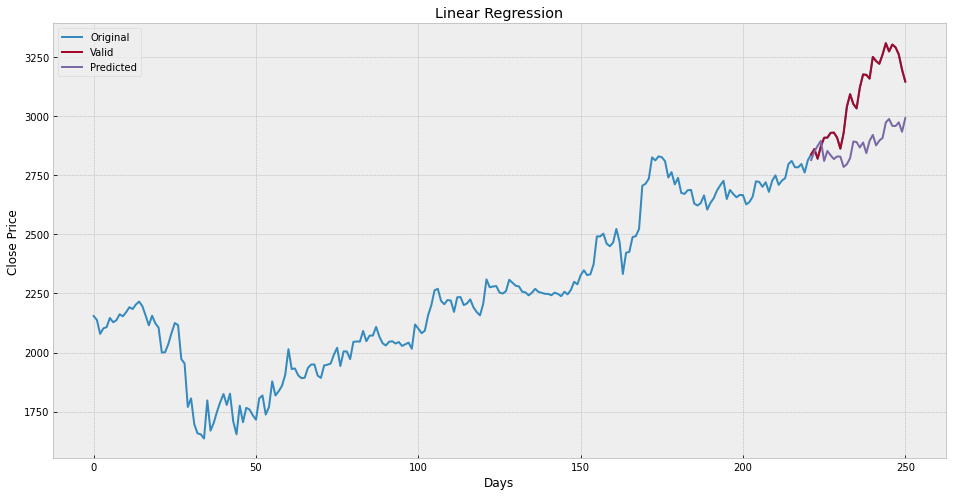

In [ ]:
#Visualize linear predictions
predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


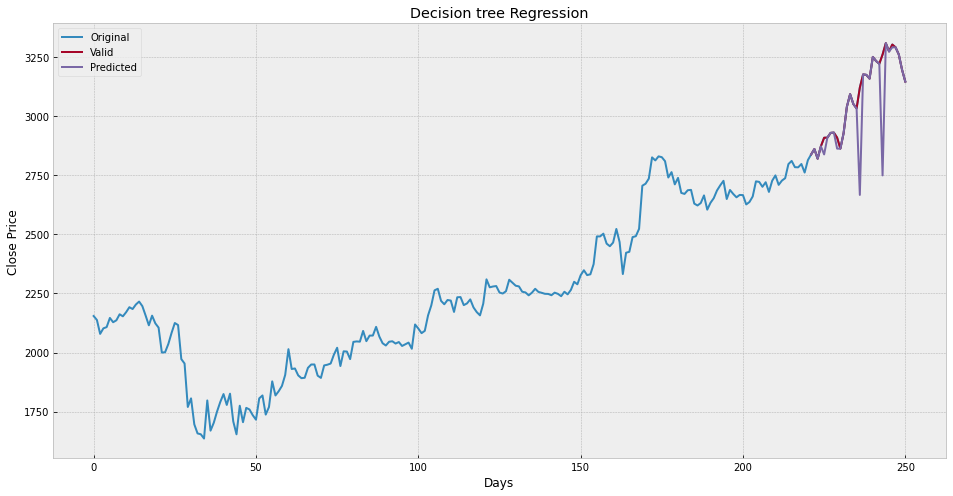

In [ ]:
#Visualize Decision tree predictions
predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision tree Regression')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])
plt.show()